In [14]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [1]:
from quickclus import QuickClus

In [3]:
import pandas as pd

In [8]:
df = pd.read_csv("Mall_Customers.csv")

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
clf = QuickClus(n_components = 2)

In [40]:
clf.fit(df.drop("CustomerID", axis = 1))

In [41]:
results = clf.assing_results(df)

In [42]:
results.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


In [43]:
clf.cluster_summary(results)

,data_prop,data_count,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
-1,0.230,46,111.173913,34.913043,65.108696,51.500000
4,0.195,39,71.820513,37.076923,49.358974,44.487179
1,0.170,34,72.735294,37.441176,48.676471,41.882353
3,0.170,34,89.411765,45.558824,56.117647,45.647059
0,0.140,28,162.285714,32.321429,85.428571,81.428571
2,0.095,19,112.000000,52.157895,65.105263,35.789474


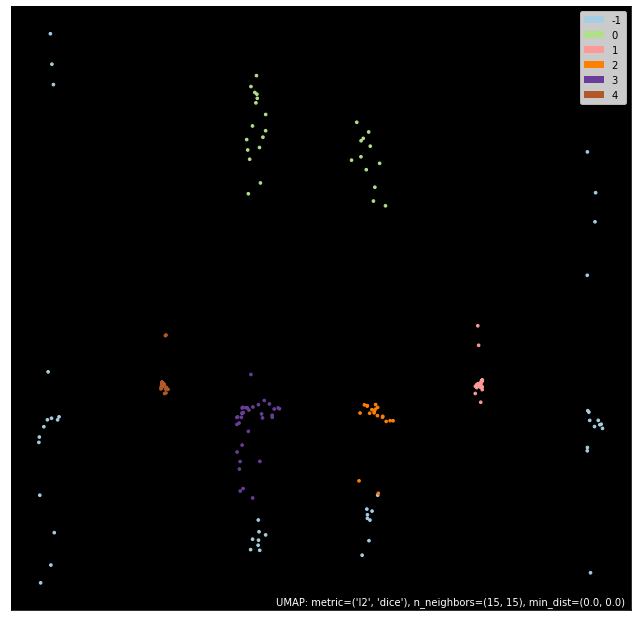

In [19]:
clf.plot_2d_labels()

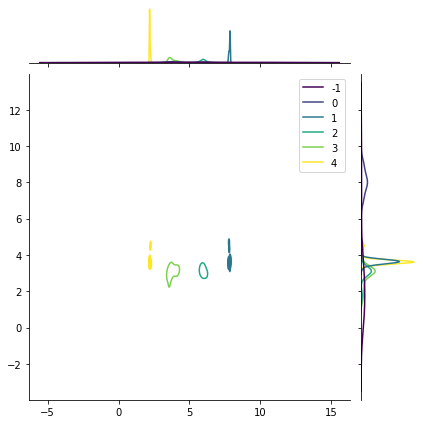

In [20]:
clf.plot_embedding_labels()

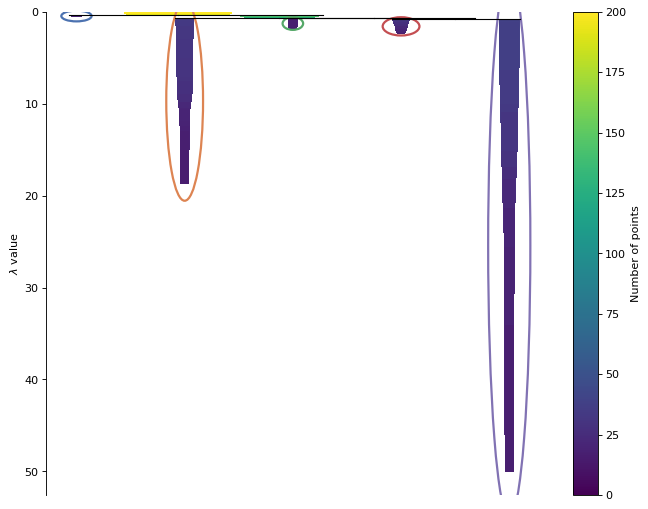

In [21]:
clf.plot_condensed_tree()

In [46]:
clf.tune_model()

[I 2022-03-17 20:21:15,190] A new study created in memory with name: no-name-db1cb555-52b8-4749-9a8d-d8b2438c8b04
[I 2022-03-17 20:21:15,305] Trial 0 finished with value: 0.3103889994837777 and parameters: {'min_cluster': 16, 'min_samples': 6}. Best is trial 0 with value: 0.3103889994837777.
[I 2022-03-17 20:21:15,367] Trial 1 finished with value: 0.13828448084831535 and parameters: {'min_cluster': 4, 'min_samples': 11}. Best is trial 0 with value: 0.3103889994837777.
[I 2022-03-17 20:21:15,441] Trial 2 finished with value: 0.2957411491920172 and parameters: {'min_cluster': 6, 'min_samples': 4}. Best is trial 0 with value: 0.3103889994837777.
[I 2022-03-17 20:21:15,504] Trial 3 finished with value: 0.3082902937047456 and parameters: {'min_cluster': 6, 'min_samples': 6}. Best is trial 0 with value: 0.3103889994837777.
[I 2022-03-17 20:21:15,555] Trial 4 finished with value: 0.2221359609043596 and parameters: {'min_cluster': 24, 'min_samples': 9}. Best is trial 0 with value: 0.3103889994

Best parameters:  {'min_cluster': 10, 'min_samples': 3}


QuickClus(min_samples=15, n_components=2)

In [47]:
results = clf.assing_results(df)
clf.cluster_summary(results, metric = "mean")

,data_prop,data_count,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
7,0.210,42,93.500000,40.952381,57.642857,45.285714
6,0.195,39,71.820513,37.076923,49.358974,44.487179
9,0.085,17,50.882353,36.941176,40.294118,43.764706
4,0.085,17,111.117647,55.647059,64.823529,36.529412
1,0.080,16,159.625000,32.062500,83.500000,81.000000
-1,0.070,14,136.285714,33.357143,75.285714,66.571429
3,0.060,12,96.583333,41.500000,59.666667,49.083333
0,0.060,12,165.833333,32.666667,88.000000,82.000000
8,0.055,11,80.181818,39.454545,51.454545,35.181818
5,0.050,10,99.800000,20.200000,60.400000,38.900000


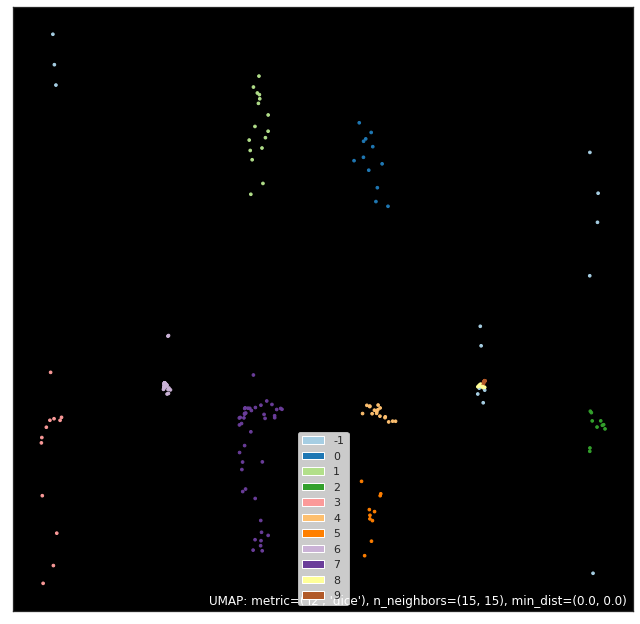

In [48]:
clf.plot_2d_labels()

In [49]:
import seaborn as sns
from matplotlib.pyplot import figure

<AxesSubplot:xlabel='Cluster', ylabel='Spending Score (1-100)'>

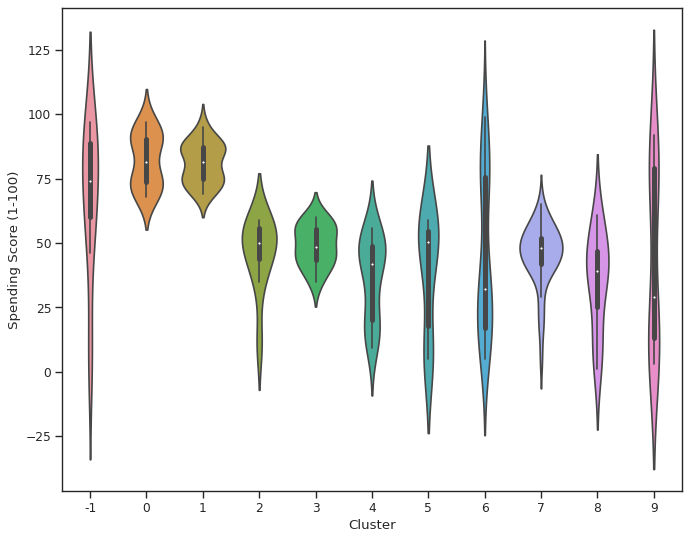

In [50]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Spending Score (1-100)", data = results)

<AxesSubplot:xlabel='Cluster', ylabel='Age'>

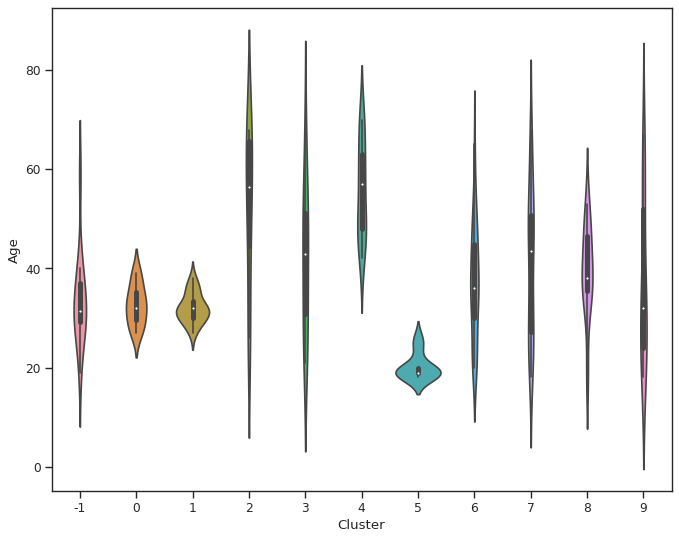

In [52]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Age", data = results)

<AxesSubplot:xlabel='Cluster', ylabel='Age'>

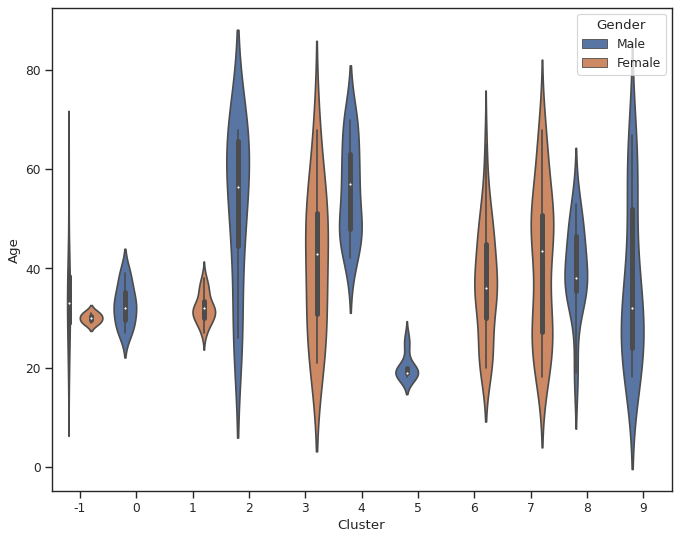

In [51]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Age", data = results, hue = "Gender")

<AxesSubplot:xlabel='Cluster', ylabel='Annual Income (k$)'>

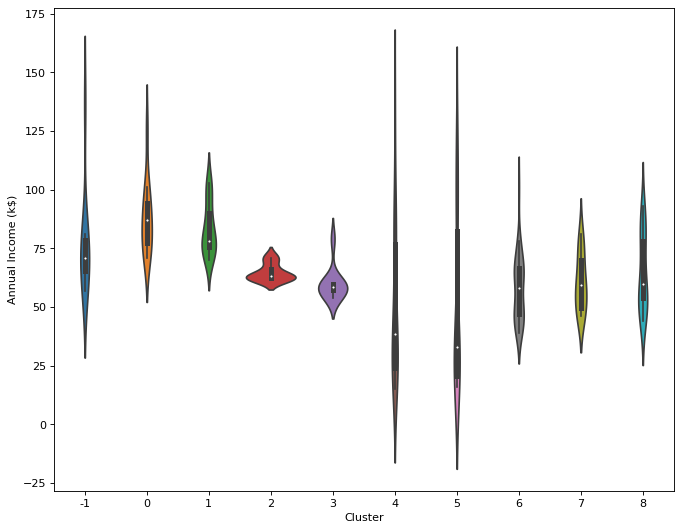

In [36]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Annual Income (k$)", data = results)

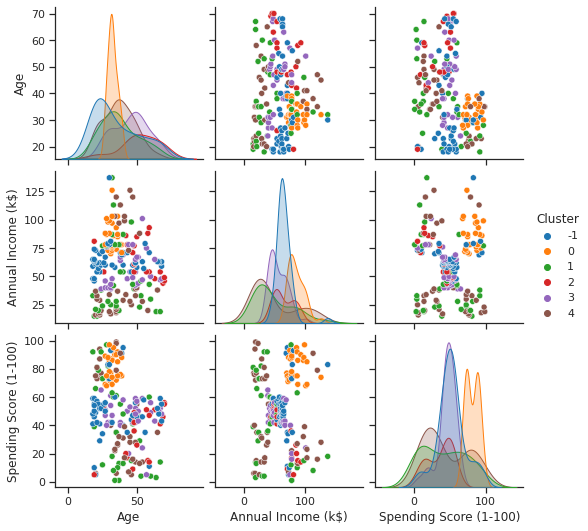

In [44]:
sns.set_theme(style="ticks")

sns.pairplot(results.drop("CustomerID", axis = 1), hue = "Cluster", palette = "tab10")